In [ ]:
!pip install torch==2.2
!pip install torchvision==0.17

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import gc
import math
import matplotlib.pyplot as plt

## Intro

In [ ]:
points = torch.tensor([1.0, 4.0, 2.0, 1.0, 3.0, 5.0])
points

tensor([1., 4., 2., 1., 3., 5.])

In [ ]:
points.shape

torch.Size([6])

In [ ]:
points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
points.storage()

<ipython-input-5-aa051972579d>:2: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  points.storage()


 1.0
 4.0
 2.0
 1.0
 3.0
 5.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]

In [ ]:
points.untyped_storage()

 0
 0
 128
 63
 0
 0
 128
 64
 0
 0
 0
 64
 0
 0
 128
 63
 0
 0
 64
 64
 0
 0
 160
 64
[torch.storage.UntypedStorage(device=cpu) of size 24]

In [ ]:
points.size()

torch.Size([3, 2])

In [ ]:
points.storage_offset()

0

In [ ]:
points[1].storage_offset()

2

In [ ]:
points.stride()

(2, 1)

## Data types
PyTorch offers the following data types to be contained within tensors:
* `torch.float32` or `torch.float` - 32-bit floating-point.
* `torch.float64` or `torch.double` - 64-bit, double-precision floating-point.
* `torch.float16` or `torch.half` - 16-bit, half-precision floating-point.
* `torch.int8` - Signed 8-bit integers.
* `torch.uint-8` - Unsigned 8-bit integers.
* `torch.int16` or `torch.short` - Signed 16-bit integers.
* `torch.int32` or `torch.int` - Signed 32-bit integers.
* `torch.int32` or `torch.long` - Signed 64-bit integers.

In [ ]:
points = torch.tensor([[1.0, 2.0], [3.0, 4.0]], dtype=torch.float32, device='cpu')
points

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
points = points.to(device='cuda')

In [ ]:
points.is_cuda

True

In [ ]:
points

tensor([[1., 2.],
        [3., 4.]], device='cuda:0')

In [ ]:
points = points.to(device='cpu')

In [ ]:
points.is_cuda

False

In [ ]:
!nvidia-smi

Sat Jul 13 11:30:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0              27W /  70W |    121MiB / 15360MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## PyTorch Modules
### a) `torch.nn`

In [ ]:
weights = torch.randn(256, 4) / math.sqrt(256)
weights

tensor([[-0.1141, -0.0786, -0.0948,  0.0550],
        [-0.0444,  0.0109, -0.1042, -0.0126],
        [-0.1262,  0.0910,  0.0135,  0.0386],
        ...,
        [ 0.0255, -0.1038,  0.0020, -0.0006],
        [-0.0408, -0.0078, -0.0110,  0.0438],
        [-0.0502,  0.2021,  0.0157, -0.0165]])

In [ ]:
# We then ensure that the parameters of this neural network are trainable, that is, the numbers in the 256x4 matrix can be
# tuned with the help of back propagation.
weights.requires_grad_()

tensor([[-0.1141, -0.0786, -0.0948,  0.0550],
        [-0.0444,  0.0109, -0.1042, -0.0126],
        [-0.1262,  0.0910,  0.0135,  0.0386],
        ...,
        [ 0.0255, -0.1038,  0.0020, -0.0006],
        [-0.0408, -0.0078, -0.0110,  0.0438],
        [-0.0502,  0.2021,  0.0157, -0.0165]], requires_grad=True)

In [ ]:
# Finally we also add the bias weights for the 4-dimensiona output, and make these trainable too
bias = torch.zeros(4, requires_grad=True)
bias

tensor([0., 0., 0., 0.], requires_grad=True)

In [ ]:
# We can instead use nn.Linear(256, 4) to represent the same thing in PyTorch
nn.Linear(256, 4)

Linear(in_features=256, out_features=4, bias=True)

In [ ]:
#loss_funct = F.cross_entropy
#loss = loss_funct(model(X), y)

### b) `torch.optim`

In [ ]:
#opt = optim.SGD(model.parameters(), lr=lr)

### c) `torch.utils.data`

## Training a Neural Network using PyTorch
### a) Define Model Architecture

![ConvNet](https://github.com/dancodermachine/mastering_pytorch_v2/blob/main/images/chap1_cnn.png?raw=True)

In [ ]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.cn1 = nn.Conv2d(1, 16, 3, 1)
    self.cn2 = nn.Conv2d(16, 32, 3, 1)
    self.dp1 = nn.Dropout2d(0.10)
    self.dp2 = nn.Dropout2d(0.25)
    self.fc1 = nn.Linear(4608, 64)
    self.fc2 = nn.Linear(64, 10)

  def forward(self, x):
    x = self.cn1(x)
    x = F.relu(x)
    x = self.cn2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, 2)
    x = self.dp1(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.dp2(x)
    x = self.fc2(x)
    op = F.log_softmax(x, dim=1)
    return op


## b) Define Training and Inference Routines

In [ ]:
def train(model, device, train_dataloader, optim, epoch):
  model.train()
  for b_i, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)
    optim.zero_grad()
    pred_prob = model(X)
    loss = F.nll_loss(pred_prob, y)
    loss.backward
    optim.step()
    if b_i % 10 == 0:
      print("Epoch: {} [{}/{} ({:.0f}%)]\t training loss {:.6f}".format(epoch,
                                                                        b_i * len(X), # Instances
                                                                        len(train_dataloader.dataset),
                                                                        100. * b_i / len(train_dataloader),
                                                                        loss.item()))

In [ ]:
def test(model, device, test_dataloader):
  model.eval()
  loss = 0
  success = 0
  with torch.no_grad():
    for X, y in test_dataloader:
      X.to(device), y.to(device)
      pred_prob = model(X)
      loss += F.nll_loss(pred_prob, y, reduction='sum').item() # Loss summed across the batch
      pred = pred_prob.argmax(dim=1, keepdim=True) # Use argmax to get the most likely prediction
      success += pred.eq(y.view_as(pred)).sum().item()

  loss /= len(test_dataloader.dataset)

  print("\nTest dataset: Overall Loss: {:.4f}, Overall Accuracy: {}/{} ({:.0f}%)\n".format(loss,
                                                                                           success,
                                                                                           len(test_dataloader.dataset),
                                                                                           100. * success / len(test_dataloader.dataset)))

### c) Create Data Loaders

In [ ]:
# The mean and std values are calculated as the mean of all pixel values of all images in the training dataset.
train_dataloader = torch.utils.data.DataLoader(datasets.MNIST("../data",
                                                              train=True,
                                                              download=True,
                                                              transform=transforms.Compose([transforms.ToTensor(),
                                                                                        transforms.Normalize((0.1302),
                                                                                                             (0.3069))])),
                                               batch_size=32,
                                               shuffle=True)

test_dataloader = torch.utils.data.DataLoader(datasets.MNIST("../data",
                                                             train=False,
                                                             download=True,
                                                             transform=transforms.Compose([transforms.ToTensor(),
                                                                                           transforms.Normalize((0.1302),
                                                                                                                (0.3069))])),
                                              batch_size=512,
                                              shuffle=False)

### d) Define Optimizer and Run Training Epochs

In [ ]:
torch.manual_seed(0)
device = torch.device("cpu")

model = ConvNet()
optimizer = optim.Adadelta(model.parameters(), lr=0.5)

### e) Model Training

In [ ]:
for epoch in range(1, 3):
  train(model, device, train_dataloader, optimizer, epoch)
  test(model, device, test_dataloader)

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1347: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch: 1 [0/60000 (0%)]	 training loss 2.310609
Epoch: 1 [320/60000 (1%)]	 training loss 2.301408
Epoch: 1 [640/60000 (1%)]	 training loss 2.285816
Epoch: 1 [960/60000 (2%)]	 training loss 2.315040
Epoch: 1 [1280/60000 (2%)]	 training loss 2.338356
Epoch: 1 [1600/60000 (3%)]	 training loss 2.304013
Epoch: 1 [1920/60000 (3%)]	 training loss 2.290039
Epoch: 1 [2240/60000 (4%)]	 training loss 2.289615
Epoch: 1 [2560/60000 (4%)]	 training loss 2.277966
Epoch: 1 [2880/60000 (5%)]	 training loss 2.299315
Epoch: 1 [3200/60000 (5%)]	 training loss 2.310122
Epoch: 1 [3520/60000 (6%)]	 training loss 2.275659
Epoch: 1 [3840/60000 (6%)]	 training loss 2.318302
Epoch: 1 [4160/60000 (7%)]	 training loss 2.310825
Epoch: 1 [4480/60000 (7%)]	 training loss 2.302435
Epoch: 1 [4800/60000 (8%)]	 training loss 2.310029
Epoch: 1 [5120/60000 (9%)]	 training loss 2.282497
Epoch: 1 [5440/60000 (9%)]	 training loss 2.320853
Epoch: 1 [5760/60000 (10%)]	 training loss 2.330604
Epoch: 1 [6080/60000 (10%)]	 trainin

In [ ]:
!nvidia-smi

Sat Jul 13 11:31:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0              27W /  70W |    121MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### f) Run Inference on Trained Model

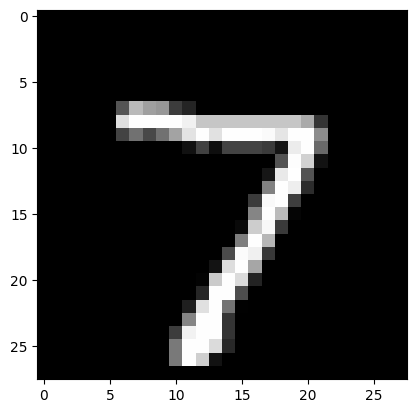

In [ ]:
test_samples = enumerate(test_dataloader)
b_i, (sample_data, sample_targets) = next(test_samples)

plt.imshow(sample_data[0][0], cmap='gray', interpolation='none')
plt.show()

In [ ]:
print(f"Model prediction is : {model(sample_data).data.max(1)[1][0]}")
print(f"Ground truth is : {sample_targets[0]}")

Model prediction is : 5
Ground truth is : 7
